# Exploring Istanbul's Retail Landscape: Customer Shopping Dataset - Retail Sales Data

Welcome to the shopping world of Istanbul! Our dataset contains shopping information from 10 different shopping malls between 2021 and 2023. We have gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul. The dataset includes essential information such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations. We hope that this dataset will serve as a valuable resource for researchers, data analysts, and machine learning enthusiasts who want to gain insights into shopping trends and patterns in Istanbul. Explore the dataset and discover the fascinating world of Istanbul shopping!

Attribute Information:

* invoice_no: Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.
* customer_id: Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.
* gender: String variable of the customer's gender.
* age: Positive Integer variable of the customers age.
* category: String variable of the category of the purchased product.
* quantity: The quantities of each product (item) per transaction. Numeric.
* price: Unit price. Numeric. Product price per unit in Turkish Liras (TL).
payment_method: String variable of the payment method (cash, credit card or debit card) used for the * transaction.
* invoice_date: Invoice date. The day when a transaction was generated.
* shopping_mall: String variable of the name of the shopping mall where the transaction was made.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:

customer_data = pd.read_csv('customer_shopping_data.csv')
customer_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [4]:

customer_data['invoice_date'] = pd.to_datetime(customer_data['invoice_date'], format='%d/%m/%Y')
customer_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


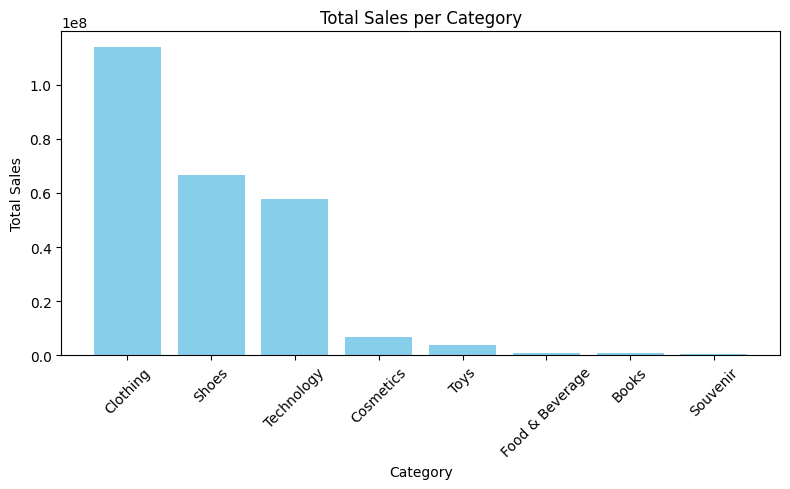

,category,total_sales,average_sales
1,Clothing,1.139968e+08,3305.500364
4,Shoes,6.655345e+07,6632.793649
6,Technology,5.786235e+07,11581.735388
2,Cosmetics,6.792863e+06,449.947864
7,Toys,3.980426e+06,394.609521
3,Food & Beverage,8.495351e+05,57.494251
0,Books,8.345529e+05,167.547260
5,Souvenir,6.358247e+05,127.190368


In [5]:
import matplotlib.pyplot as plt


customer_data['total_sales'] = customer_data['quantity'] * customer_data['price']

sales_per_category = customer_data.groupby('category').agg({'total_sales': ['sum', 'mean']})
sales_per_category.reset_index(inplace=True)
sales_per_category.columns = ['category', 'total_sales', 'average_sales']
sales_per_category.sort_values(by='total_sales', ascending=False, inplace=True)

# Plotting the total sales per category
plt.figure(figsize=(8, 5))
plt.bar(sales_per_category['category'], sales_per_category['total_sales'], color='skyblue')
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the sorted sales per category
sales_per_category

The category with the highest total sales is Clothing, followed by Shoes and Technology.
The Technology category, while not the top in total sales, has the highest average sales per transaction, indicating higher-priced items or larger quantities being sold per purchase.
Categories like Food & Beverage, Books, and Souvenir have significantly lower total and average sales.
To increase sales, consider the following suggestions:

* Focus on high-performing categories like Clothing and Shoes by increasing inventory or variety in these categories.
* Explore marketing strategies for Technology, as it has high average sales, which could indicate a strong customer interest or higher profit margins.
* Investigate why categories like Food & Beverage, Books, and Souvenir are underperforming. It could be due to less customer interest, pricing, or competition. Strategies could include promotions, discounts, or bundle deals to increase their attractiveness.

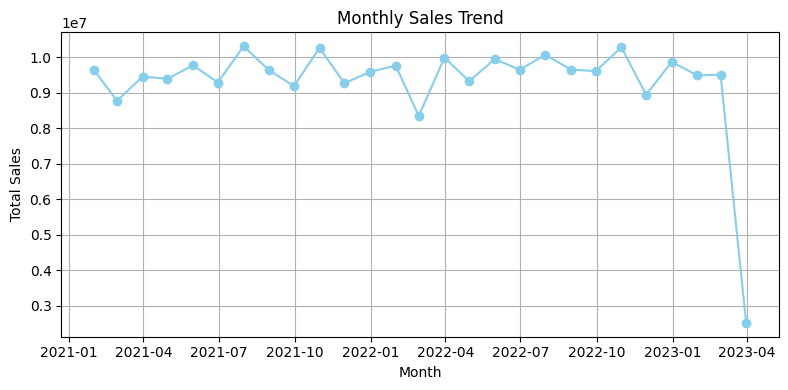

invoice_date
2021-01-31    9641614.62
2021-02-28    8772315.22
2021-03-31    9455359.38
2021-04-30    9389541.54
2021-05-31    9771756.97
Freq: M, Name: total_sales, dtype: float64

In [6]:
customer_data['invoice_date'] = pd.to_datetime(customer_data['invoice_date'], format='%d/%m/%Y')

monthly_sales = customer_data.set_index('invoice_date').resample('M')['total_sales'].sum()

# Plotting the monthly sales trend
plt.figure(figsize=(8, 4))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

monthly_sales.head()

The monthly sales trend has been plotted, and the first few months of data are displayed above. The trend shows fluctuations in sales over time, which could be influenced by various factors such as seasonal demand, marketing campaigns, or economic conditions.

To further increase sales, consider the following based on the sales trend:

Analyze the months with peak sales to understand what drove the increase, such as seasonal promotions or events, and replicate these strategies in lower-performing months.
For months with lower sales, investigate if external factors or inventory issues may have contributed to the decline and address these issues.
Implement targeted marketing campaigns during typically low sales periods to boost customer interest and sales.

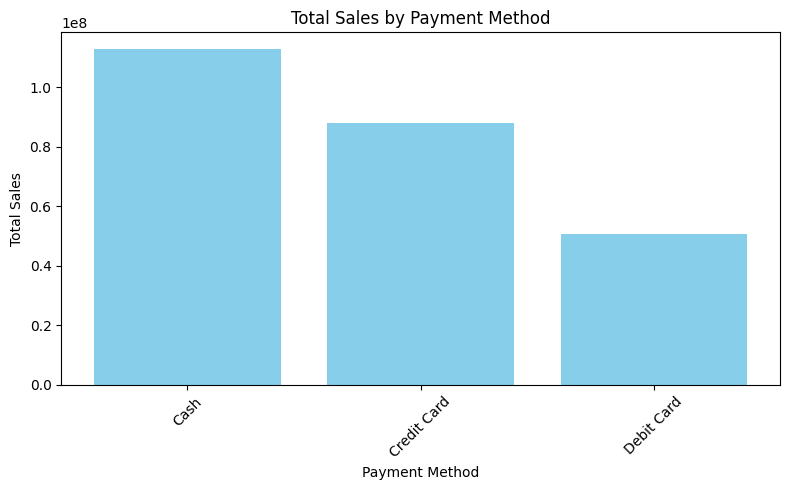

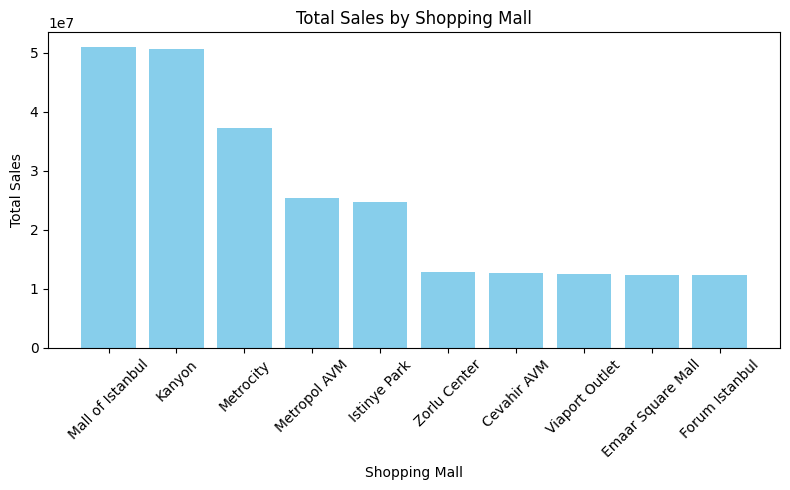

(payment_method
 Cash           1.128322e+08
 Credit Card    8.807712e+07
 Debit Card     5.059643e+07
 Name: total_sales, dtype: float64,
 shopping_mall
 Mall of Istanbul     50872481.68
 Kanyon               50554231.10
 Metrocity            37302787.33
 Metropol AVM         25379913.19
 Istinye Park         24618827.68
 Zorlu Center         12901053.82
 Cevahir AVM          12645138.20
 Viaport Outlet       12521339.72
 Emaar Square Mall    12406100.29
 Forum Istanbul       12303921.24
 Name: total_sales, dtype: float64)

In [7]:
sales_by_payment_method = customer_data.groupby('payment_method')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(sales_by_payment_method.index, sales_by_payment_method.values, color='skyblue')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sales_by_mall = customer_data.groupby('shopping_mall')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(sales_by_mall.index, sales_by_mall.values, color='skyblue')
plt.title('Total Sales by Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sales_by_payment_method, sales_by_mall

Cash is the most popular payment method, followed by credit card and debit card. This suggests that customers may prefer the immediacy and convenience of cash transactions.
The Mall of Istanbul generates the highest total sales among the shopping malls, closely followed by Kanyon and Metrocity.
To leverage these insights for increasing sales:

* Since cash transactions are predominant, ensure that all points of sale are equipped to handle cash efficiently and securely.
* * Consider incentives for using credit and debit cards, such as loyalty points or cashback offers, to encourage higher sales through these methods.
* Focus on the top-performing malls like Mall of Istanbul and Kanyon for marketing campaigns and possibly expand the store footprint in these locations.
* Investigate why certain malls like Forum Istanbul have lower sales and consider strategies to improve their performance, such as exclusive promotions or events.